In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('mnist_train.csv')

In [10]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df = np.array(df)

In [14]:
X = df[:,1:]
Y = df[:,0]

In [16]:
X.shape

(60000, 784)

In [19]:
split = int(0.8*X.shape[0])
split

48000

In [22]:
x_train = X[:split,:]
y_train = Y[:split]

x_test = X[split:,:]
y_test = Y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


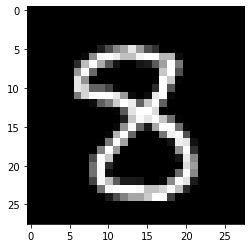

In [59]:
def img(x):
    img=x.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()
    
img(x_test[2])

In [63]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(x,y,queryPoint,K=5):
    
    vals=[]
    m = x.shape[0] #no. of elements in x matrix
    
    for i in range(m):
        d = dist(queryPoint,x[i]) #calculating the distance of qP with every element of X
        vals.append((d,y[i])) #appending the value in vals array
        
    vals = sorted(vals) #sorting the array 
    vals = vals[:K] #taking only first K elements
    
    vals = np.array(vals) # converting the array into numpy array
    new_vals = np.unique(vals[:,1],return_counts=True)  # finding the unique elements in column 1 of vals and also the no of times each element is present
    print("Vals array is: "+ str(vals))
    print("New vals is: "+ str(new_vals))
    index = new_vals[1].argmax() # finding that unique element which occurs the most
    print("index is: "+str(index))
    pred = new_vals[0][index]
    
    accuracy = (max(new_vals[1])/K)*100
    print("Accuracy is: "+str(accuracy))
    
    return pred

In [64]:
Pred = KNN(x_train,y_train,x_test[2])

Vals array is: [[1488.98992609    3.        ]
 [1543.13738857    8.        ]
 [1601.14708881    8.        ]
 [1616.42475853    3.        ]
 [1628.10288373    8.        ]]
New vals is: (array([3., 8.]), array([2, 3]))
index is: 1
Accuracy is: 60.0


In [65]:
Pred

8.0